In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [4]:
btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [5]:
p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [6]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2020-11-06 00:00:00+00:00,15565.880859,39837841971,454.719299,16738305610,1.000296,52898738178,29.018000,343104562
2020-11-07 00:00:00+00:00,14833.753906,35024953706,435.713135,18873289788,1.001576,56226369647,27.738094,362934993
2020-11-08 00:00:00+00:00,15479.567383,26632075029,453.554779,11292383601,1.000846,36518314883,28.305117,321186882
2020-11-09 00:00:00+00:00,15332.315430,34149115566,444.163055,13704320630,1.000653,46110330836,28.018021,335957338
2020-11-10 00:00:00+00:00,15290.902344,25574938143,449.679626,12090381666,1.001127,38577912936,28.193342,310738349


In [7]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2025-11-02 00:00:00+00:00,110639.625000,34284209459,3911.063232,20479611654,1.000066,87990855403,1084.359863,2049912244
2025-11-03 00:00:00+00:00,106547.523438,72852006359,3602.308105,53091469560,0.999853,176871325526,992.535400,4849653054
2025-11-04 00:00:00+00:00,101590.523438,110967184773,3292.574463,76827517773,0.999982,241475086413,937.893250,5824529918
2025-11-05 00:00:00+00:00,103891.835938,77584934804,3425.171143,46955882330,0.999891,164615811246,959.951050,3816276917
2025-11-06 00:00:00+00:00,101854.257812,61776601088,3338.426514,37328109568,0.999896,135608836096,950.215576,2840654848


In [8]:
data.shape

(1827, 8)

In [9]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03
mean,52261.706120,3.656324e+10,2458.763055,1.924327e+10,1.000166,6.976235e+10,430.973464,1.785060e+09
std,29304.879701,2.239236e+10,966.419716,1.280100e+10,0.000713,4.440645e+10,219.127914,1.487717e+09
min,14833.753906,5.331173e+09,435.713135,2.081626e+09,0.995872,9.989859e+09,27.361004,2.038465e+08
25%,28176.900391,2.142552e+10,1709.438721,1.025234e+10,0.999914,3.977983e+10,276.177795,7.891606e+08
50%,43790.894531,3.161340e+10,2352.462646,1.616779e+10,1.000153,5.942648e+10,375.755463,1.550840e+09
75%,66564.671875,4.595327e+10,3217.429810,2.409678e+10,1.000409,8.620899e+10,588.969208,2.144827e+09
max,124752.531250,3.509679e+11,4831.348633,9.773662e+10,1.011530,3.443980e+11,1310.214355,1.798295e+10


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2020-11-06 00:00:00+00:00 to 2025-11-06 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1827 non-null   float64
 1   Volume (BTC)   1827 non-null   int64  
 2   Close (ETH)    1827 non-null   float64
 3   Volume (ETH)   1827 non-null   int64  
 4   Close (USDT)   1827 non-null   float64
 5   Volume (USDT)  1827 non-null   int64  
 6   Close (BNB)    1827 non-null   float64
 7   Volume (BNB)   1827 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.5 KB


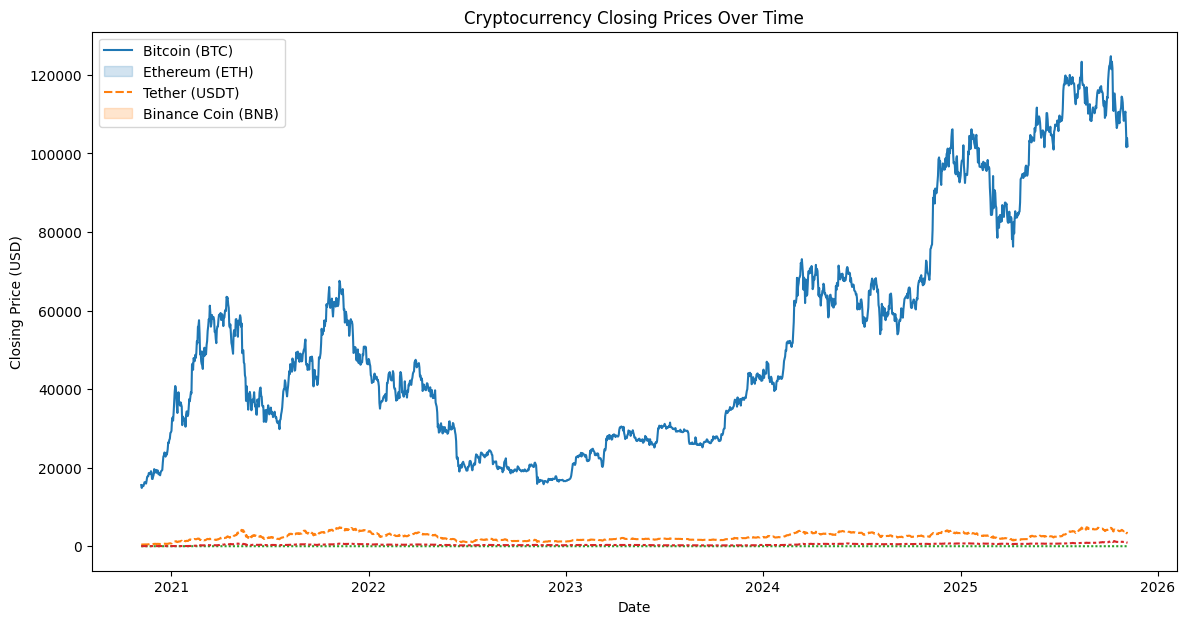

In [11]:
# Visualizing the closing prices of the cryptocurrencies over time

plt.figure(figsize=(14, 7))
sns.lineplot(data=data[['Close (BTC)', 'Close (ETH)', 'Close (USDT)', 'Close (BNB)']])
plt.title('Cryptocurrency Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend(['Bitcoin (BTC)', 'Ethereum (ETH)', 'Tether (USDT)', 'Binance Coin (BNB)'])
plt.show()


<Axes: xlabel='Date'>

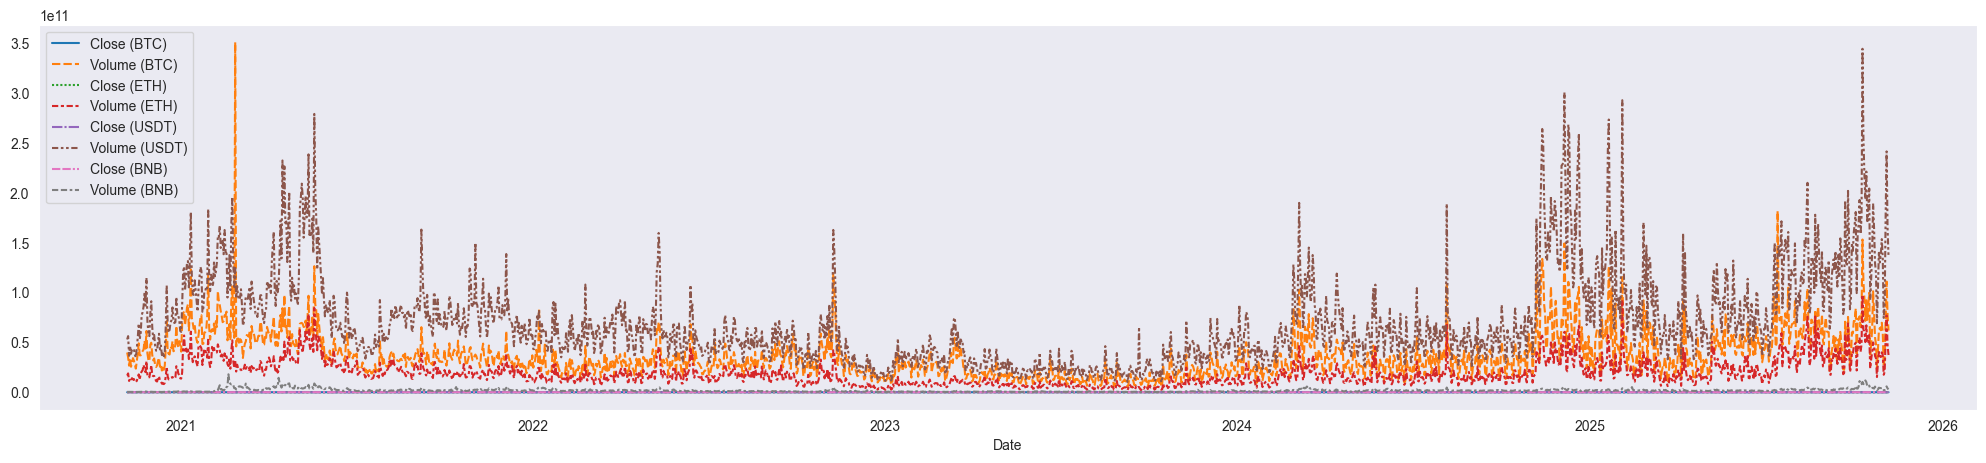

In [12]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

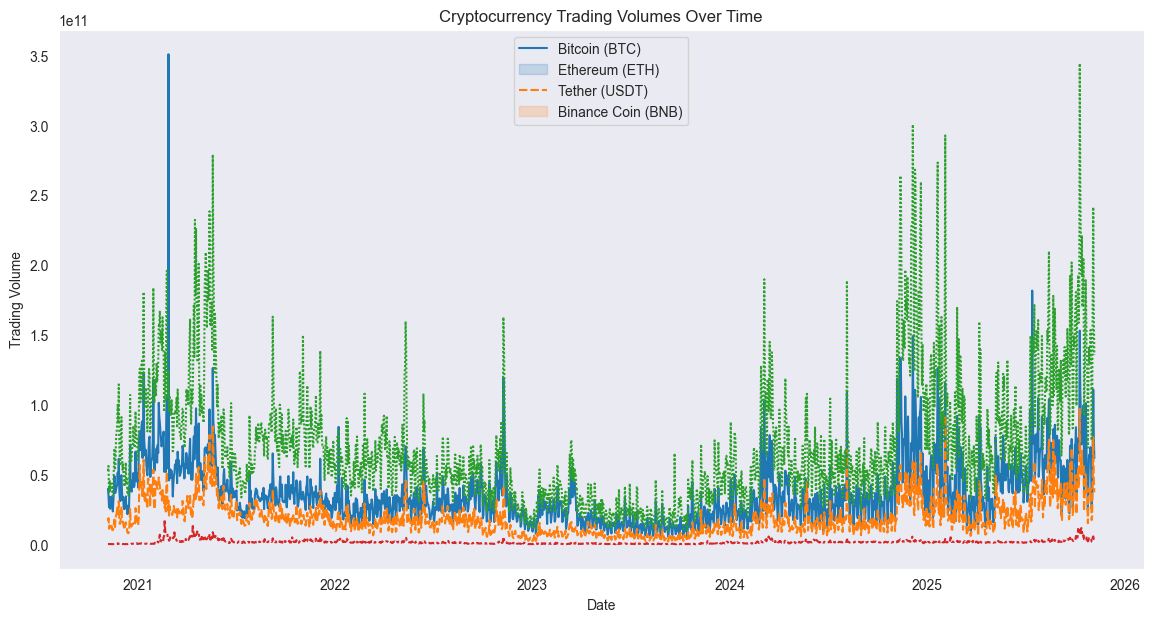

In [13]:
# Visualize the Trading Volumes
#Let's visualize the trading volumes of all four cryptocurrencies:

plt.figure(figsize=(14, 7))
sns.lineplot(data=data[['Volume (BTC)', 'Volume (ETH)', 'Volume (USDT)', 'Volume (BNB)']])
plt.title('Cryptocurrency Trading Volumes Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.legend(['Bitcoin (BTC)', 'Ethereum (ETH)', 'Tether (USDT)', 'Binance Coin (BNB)'])
plt.show()

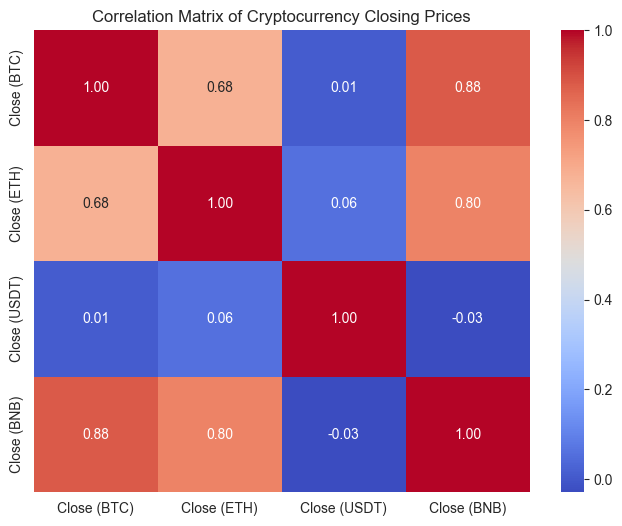

In [14]:
# Correlation Analysis
# We'll analyze the correlation between the closing prices of the cryptocurrencies:
# Calculate the correlation matrix

correlation_matrix = data[['Close (BTC)', 'Close (ETH)', 'Close (USDT)', 'Close (BNB)']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Cryptocurrency Closing Prices')
plt.show()

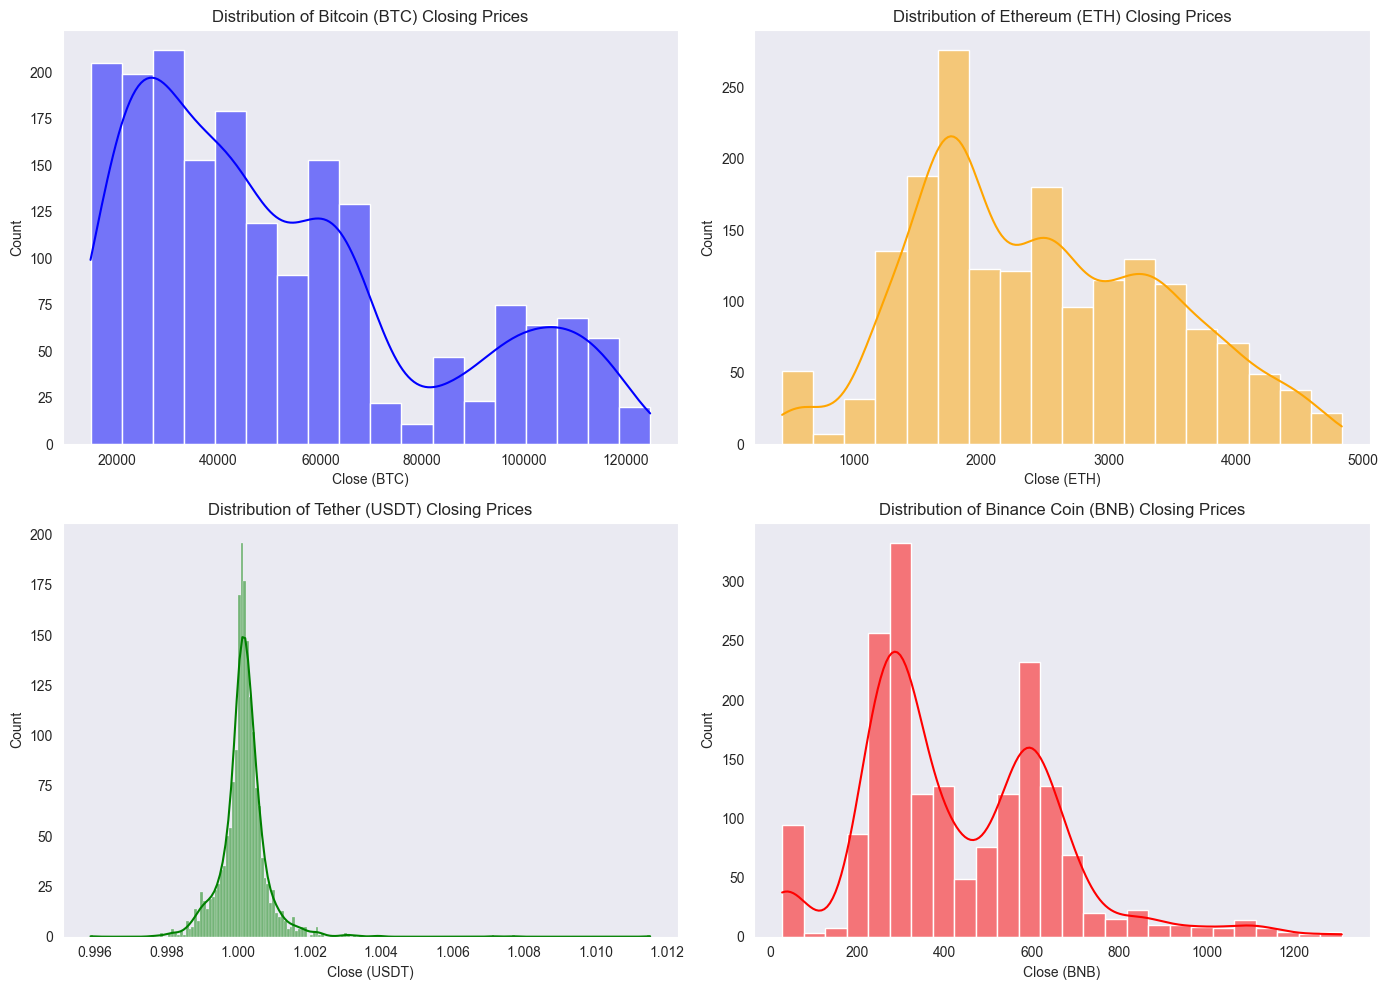

In [15]:
# Distribution of Closing Prices
# Let's plot the distribution of closing prices for each cryptocurrency:

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['Close (BTC)'], kde=True, color='blue')
plt.title('Distribution of Bitcoin (BTC) Closing Prices')

plt.subplot(2, 2, 2)
sns.histplot(data['Close (ETH)'], kde=True, color='orange')
plt.title('Distribution of Ethereum (ETH) Closing Prices')

plt.subplot(2, 2, 3)
sns.histplot(data['Close (USDT)'], kde=True, color='green')
plt.title('Distribution of Tether (USDT) Closing Prices')

plt.subplot(2, 2, 4)
sns.histplot(data['Close (BNB)'], kde=True, color='red')
plt.title('Distribution of Binance Coin (BNB) Closing Prices')

plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'Close (BTC)'}>,
        <Axes: title={'center': 'Volume (BTC)'}>,
        <Axes: title={'center': 'Close (ETH)'}>,
        <Axes: title={'center': 'Volume (ETH)'}>],
       [<Axes: title={'center': 'Close (USDT)'}>,
        <Axes: title={'center': 'Volume (USDT)'}>,
        <Axes: title={'center': 'Close (BNB)'}>,
        <Axes: title={'center': 'Volume (BNB)'}>]], dtype=object)

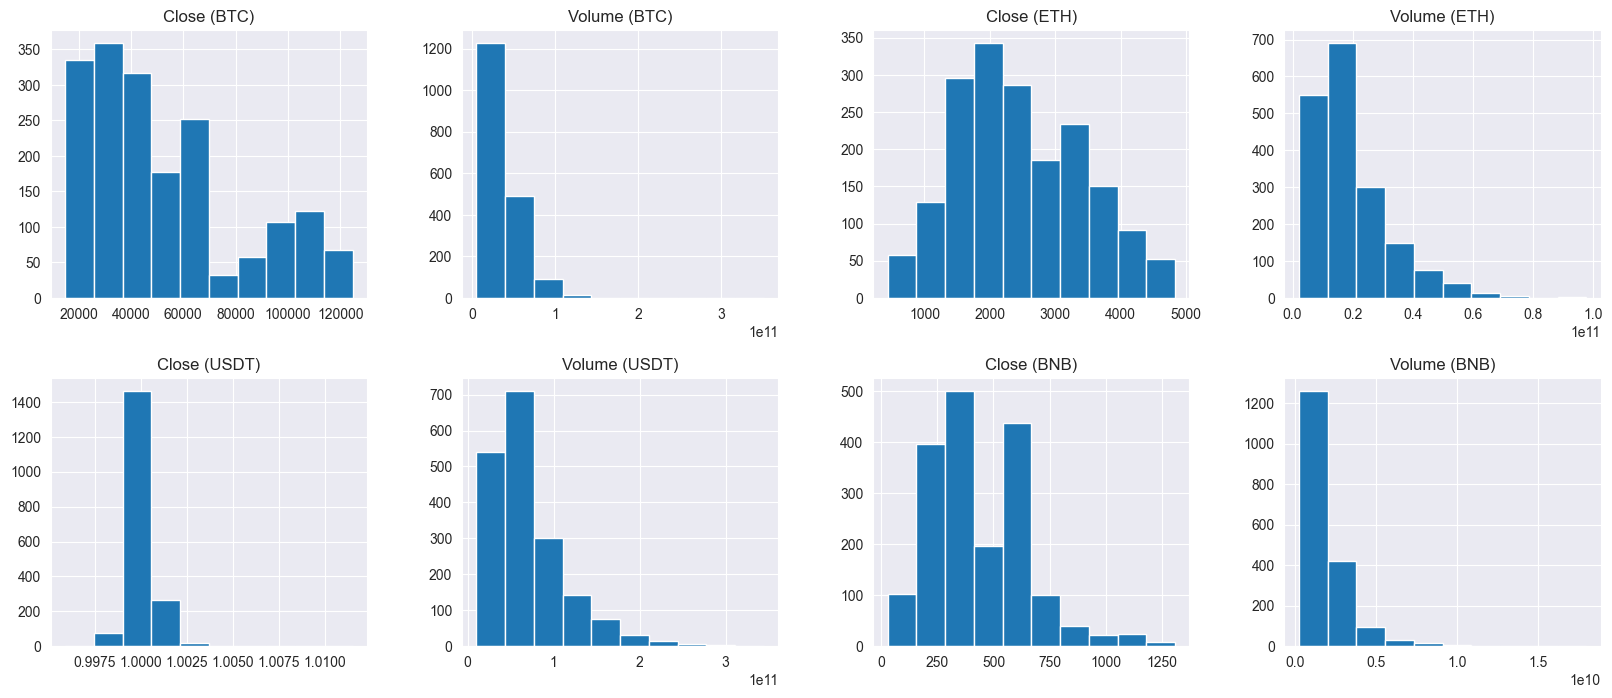

In [16]:
data.hist(figsize=(20,8),layout=(2,4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

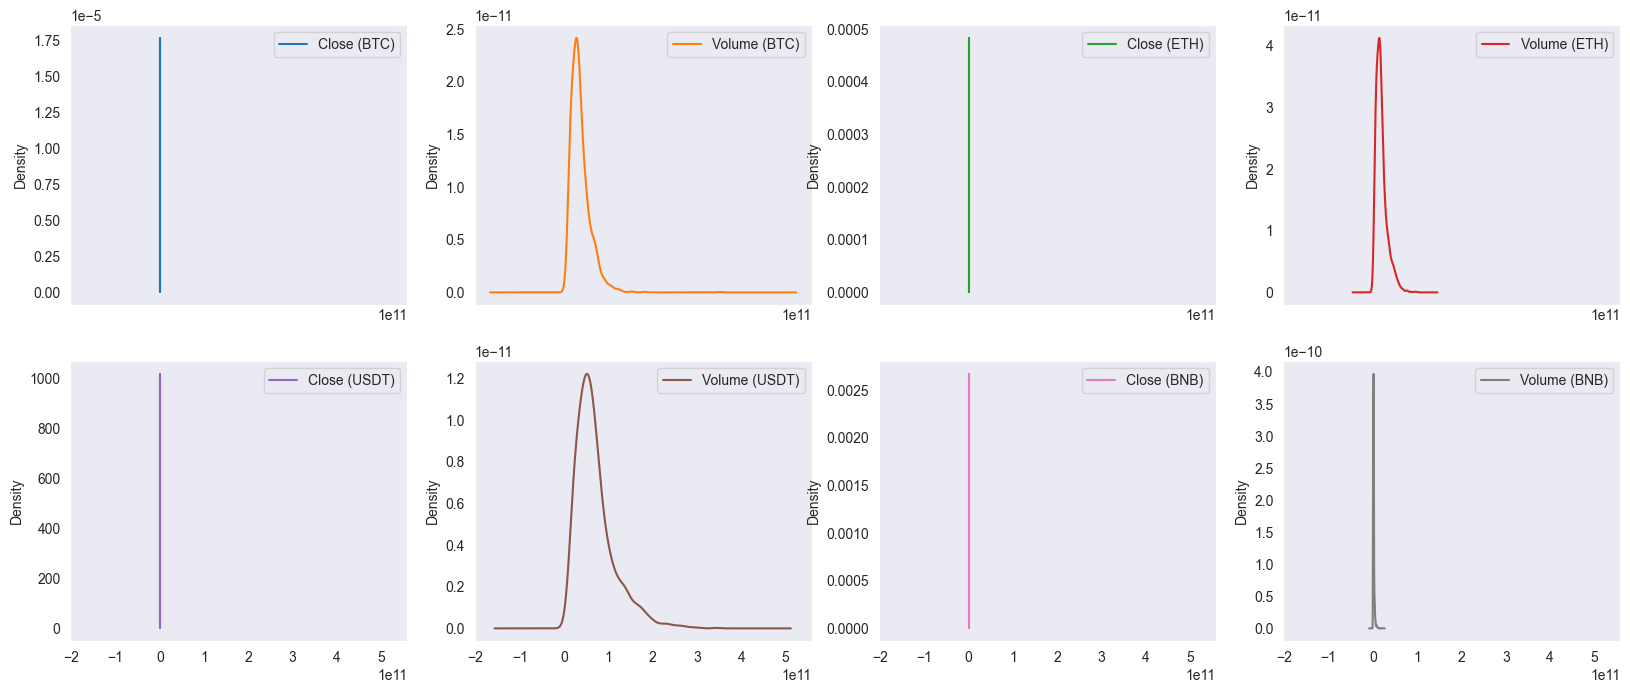

In [17]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

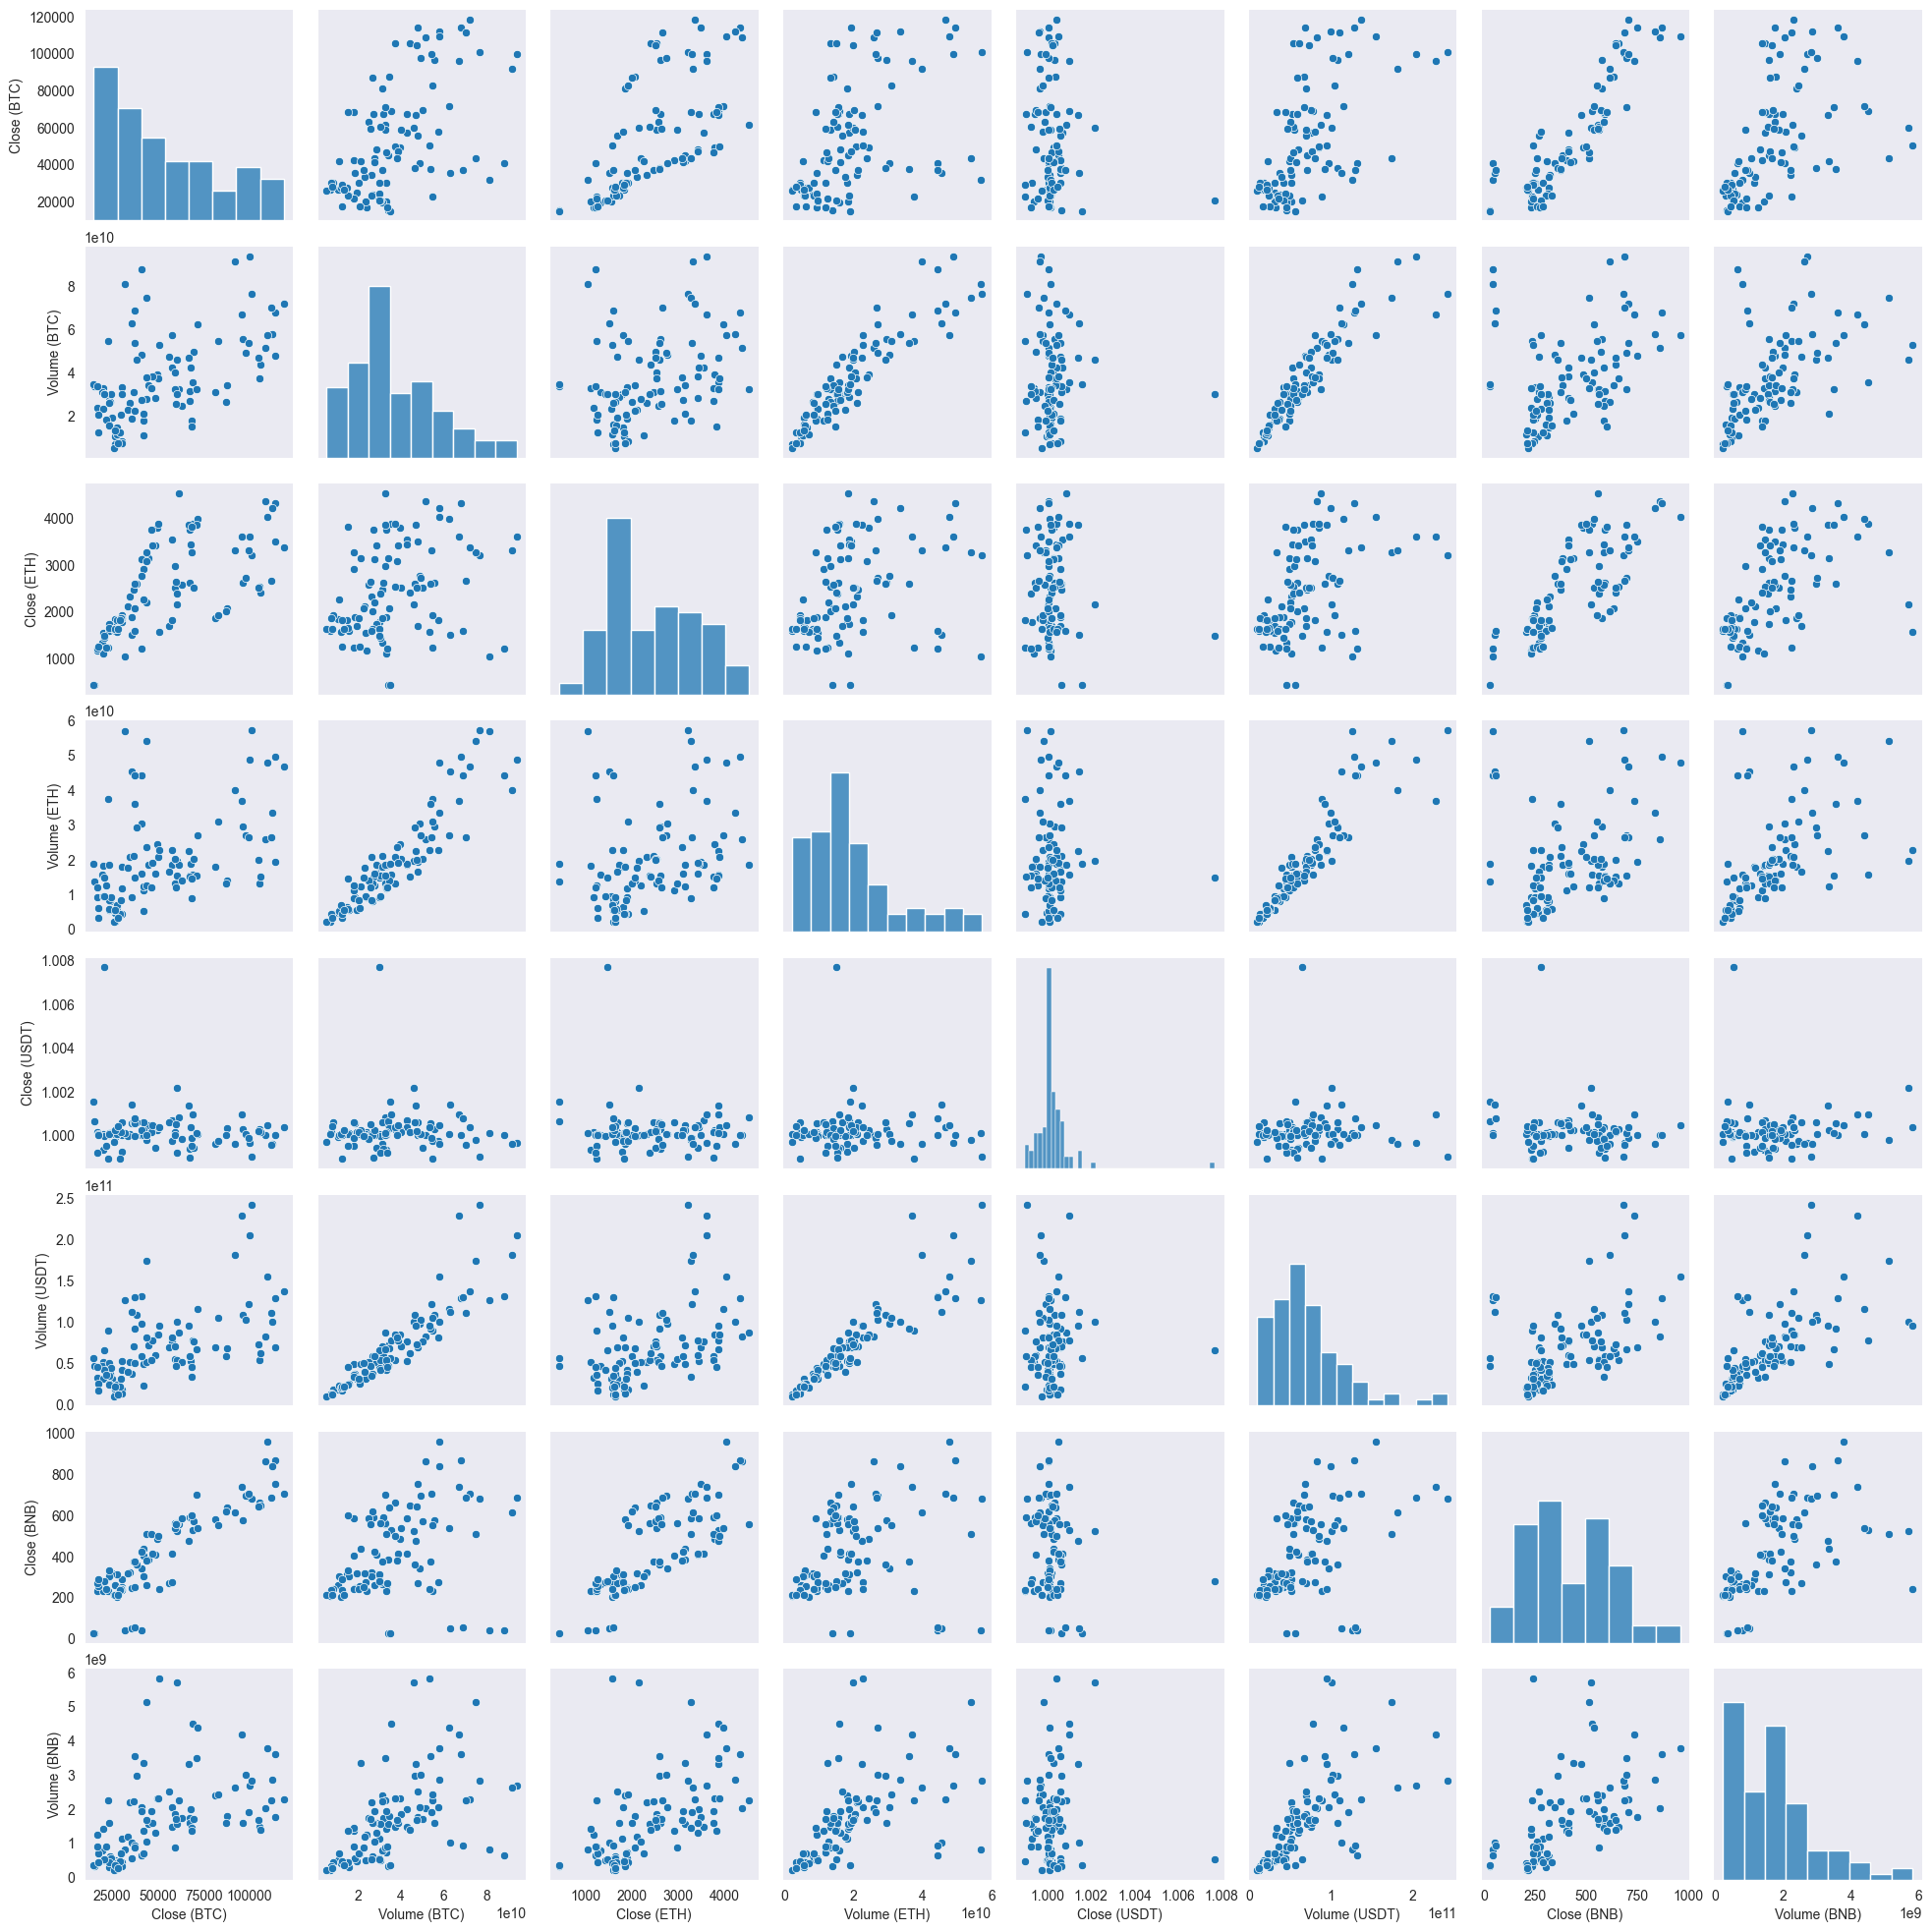

In [18]:
sns.pairplot(data.sample(n=100));

# Data Preprocessing

In [19]:
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [20]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2020-11-06 00:00:00+00:00,39837841971,454.719299,16738305610,1.000296,52898738178,29.018000,343104562
2020-11-07 00:00:00+00:00,35024953706,435.713135,18873289788,1.001576,56226369647,27.738094,362934993
2020-11-08 00:00:00+00:00,26632075029,453.554779,11292383601,1.000846,36518314883,28.305117,321186882
2020-11-09 00:00:00+00:00,34149115566,444.163055,13704320630,1.000653,46110330836,28.018021,335957338
2020-11-10 00:00:00+00:00,25574938143,449.679626,12090381666,1.001127,38577912936,28.193342,310738349


In [21]:
X.tail()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2025-11-02 00:00:00+00:00,34284209459,3911.063232,20479611654,1.000066,87990855403,1084.359863,2049912244
2025-11-03 00:00:00+00:00,72852006359,3602.308105,53091469560,0.999853,176871325526,992.535400,4849653054
2025-11-04 00:00:00+00:00,110967184773,3292.574463,76827517773,0.999982,241475086413,937.893250,5824529918
2025-11-05 00:00:00+00:00,77584934804,3425.171143,46955882330,0.999891,164615811246,959.951050,3816276917
2025-11-06 00:00:00+00:00,61776601088,3338.426514,37328109568,0.999896,135608836096,950.215576,2840654848


In [22]:
Y.head()

Date
2020-11-06 00:00:00+00:00    15565.880859
2020-11-07 00:00:00+00:00    14833.753906
2020-11-08 00:00:00+00:00    15479.567383
2020-11-09 00:00:00+00:00    15332.315430
2020-11-10 00:00:00+00:00    15290.902344
Name: Close (BTC), dtype: float64

In [23]:
Y.tail()

Date
2025-11-02 00:00:00+00:00    110639.625000
2025-11-03 00:00:00+00:00    106547.523438
2025-11-04 00:00:00+00:00    101590.523438
2025-11-05 00:00:00+00:00    103891.835938
2025-11-06 00:00:00+00:00    101854.257812
Name: Close (BTC), dtype: float64

In [24]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [25]:
# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {Y_train.shape}')
print(f'y_test shape: {Y_test.shape}')

X_train shape: (1461, 7)
X_test shape: (366, 7)
y_train shape: (1461,)
y_test shape: (366,)


In [26]:
#SelectKBest
#SelectKBest is a feature selection method provided by scikit-learn (sklearn) that selects the top k features based on a specified scoring function.
#This function evaluates each feature independently and selects those that have the strongest relationship with the target variable.

#Parameters
#k: Specifies the number of top features to select. In your case, k=4 indicates that you want to select the top 4 features

from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [27]:
mask = fs.get_support()
selected_features = X.columns[mask]
print("Selected Features:", selected_features) 

Selected Features: Index(['Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)'], dtype='object')


In [28]:
X_train


array([[1.00030398e+00, 5.35956681e+10, 3.22747742e+02, 1.36547156e+09],
       [1.00008905e+00, 9.06165920e+10, 2.70984436e+02, 2.91196231e+09],
       [9.99406993e-01, 4.92226602e+10, 2.38164474e+02, 1.60936157e+09],
       ...,
       [1.00026298e+00, 6.01778667e+10, 6.39618896e+02, 1.44971351e+09],
       [9.98970985e-01, 5.96518368e+10, 3.06791565e+02, 1.64688295e+09],
       [1.00008595e+00, 6.35606070e+10, 2.64792084e+02, 1.05717728e+09]],
      shape=(1461, 4))

In [29]:
# MinMaxScaler is a preprocessing method in scikit-learn that transforms features by scaling them to a specified range.
# It's often used when your data needs to be normalized within a specific range to ensure all features contribute equally to the analysis.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# implementation of 10 different regression algorithms using scikit-learn. Each algorithm is trained and evaluated on a sample dataset:

# Import Libraries and Generate Sample Data

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

----- Linear Regression -----
Mean Squared Error (MSE): 151709171.92993498
R-squared: 0.8266639715355338

----- Ridge Regression -----
Mean Squared Error (MSE): 154102661.74509135
R-squared: 0.8239292784813725

----- Lasso Regression -----
Mean Squared Error (MSE): 151695533.836678
R-squared: 0.8266795538031773

----- ElasticNet Regression -----
Mean Squared Error (MSE): 783936583.4087898
R-squared: 0.10430956673576108

----- Support Vector Regression (SVR) -----
Mean Squared Error (MSE): 912946005.2125074
R-squared: -0.04309075537713758

----- Decision Tree Regression -----
Mean Squared Error (MSE): 98491080.03648323
R-squared: 0.8874685529192369

----- Random Forest Regression -----
Mean Squared Error (MSE): 39567654.636805356
R-squared: 0.9547917899547631

----- Gradient Boosting Regression -----
Mean Squared Error (MSE): 45939899.51367585
R-squared: 0.9475111515773426

----- K-Nearest Neighbors Regression -----
Mean Squared Error (MSE): 47042748.33385447
R-squared: 0.94625108646687

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


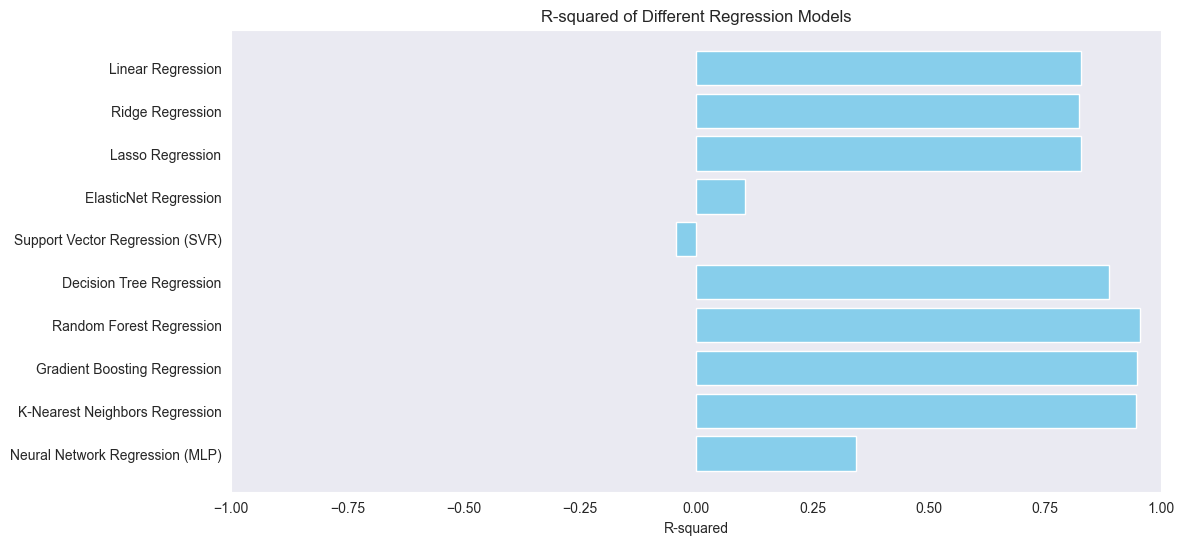

In [31]:

#Define Models and Perform Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Support Vector Regression (SVR)': SVR(kernel='rbf'),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'Neural Network Regression (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
}

# Train and evaluate each model
results = {'Model': [], 'MSE': [], 'R-squared': []}

for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on test set
    Y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Store results
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)

    # Print results
    print(f"----- {name} -----")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")
    print()

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of Different Regression Models')
plt.xlim(-1, 1)
plt.gca().invert_yaxis()
plt.show()

# Saving the Model

In [32]:
import pickle
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
X, Y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=0)


# Scale the features (optional but recommended for some algorithms)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model_rf.fit(X_train, Y_train)

# Save the model to a file
filename = 'random_forest_model.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

# Save scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the loaded model
Y_pred = loaded_model.predict(X_test)

# Evaluate the loaded model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Loaded Random Forest Regression - Mean Squared Error (MSE): {mse}")
print(f"Loaded Random Forest Regression - R-squared: {r2}")


Loaded Random Forest Regression - Mean Squared Error (MSE): 38779136.246001996
Loaded Random Forest Regression - R-squared: 0.955692715353632
